### Mutual information technique

Mutual information is a function metric(construct a ranking with a feature utility metric) measure relationship between a feature and the target. Then we can pick up smaller set of most useful features to develop our model, helping us more confidence that our time will spent on.

Mutual information look alike with correlation in that it measures a relationship between two variables, however Mutual information technique detects any kind of relationship, while correlation only detects linear relationships.

#### --------------------
Mutual information is a great general-purpose metric and especially useful at the start of feature development when we might not know what model we'd like to use yet
#### --------------------

mutual information is easy to use and interpret, computationally efficient, theoretically well-founded, resistant to overfitting, and able to detect any kind of relationship

### What mutual information measures?

* Mutual Information(MI) describes relationships in term of uncertainty.
* MI can help us to understand the relative potential of a feature as a predictor of the target
* MI can not detect interactions between features. It is univariate metric. It is possible for a feature to be very informative when interacting with other features, but not so informative all alone.
* The actual usefulness of a feature depends on the model we use it with. A feature is only useful to the exntent that its relationship with the target is one our model can learn. Just because a feature has a high MI score does not mean our model will be able to do anything with that information. We may need to transform the feature first to expose the relationship.

### Mutual Information on 1985 Automobiles, car's price prediction

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

df = pd.read_csv('./data/Automobile_data.csv')
#df.drop(columns='normalized-losses', inplace=True)
df.drop(index=df[df.price == '?'].index, inplace=True)
df.drop(index=df[df.horsepower == '?'].index, inplace=True)
df['horsepower'] = df['horsepower'].astype(int)
df['price'] =df['price'].astype(int)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


### NOTE
The scikit-learn algorithm for MI treats discrete features differently from continuous features, we need to tell it which are which. Any feature that must has a float dtype is not discrete. Categoricals (object or categorical dtype) can be treated as discrete by giving them a label encoding)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          199 non-null    int64  
 1   normalized-losses  199 non-null    object 
 2   make               199 non-null    object 
 3   fuel-type          199 non-null    object 
 4   aspiration         199 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         199 non-null    object 
 7   drive-wheels       199 non-null    object 
 8   engine-location    199 non-null    object 
 9   wheel-base         199 non-null    float64
 10  length             199 non-null    float64
 11  width              199 non-null    float64
 12  height             199 non-null    float64
 13  curb-weight        199 non-null    int64  
 14  engine-type        199 non-null    object 
 15  num-of-cylinders   199 non-null    object 
 16  engine-size        199 non

In [3]:
X = df.copy()
y = X.pop("price")

#Label encoding for categoricals
for colname in X.select_dtypes('object'):
    X[colname], _ = X[colname].factorize()
    
# All discrete features should now have integer dtypes (double-check before using MI)
discrete_features = X.dtypes == int

#### Use scikit-learn mutual information metrics
There are two MI in scikit-learn, one for real-valued targets (contiuous targets) - mutual_info_regression, and on for catagorical targets - mutual_info_classif). Our target, price is real-valued.

In [4]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

curb-weight          1.527552
highway-mpg          0.946016
bore                 0.714093
length               0.595237
fuel-system          0.480186
num-of-cylinders     0.333241
compression-ratio    0.198558
body-style           0.063357
num-of-doors         0.001521
Name: MI Scores, dtype: float64

#### Visualization

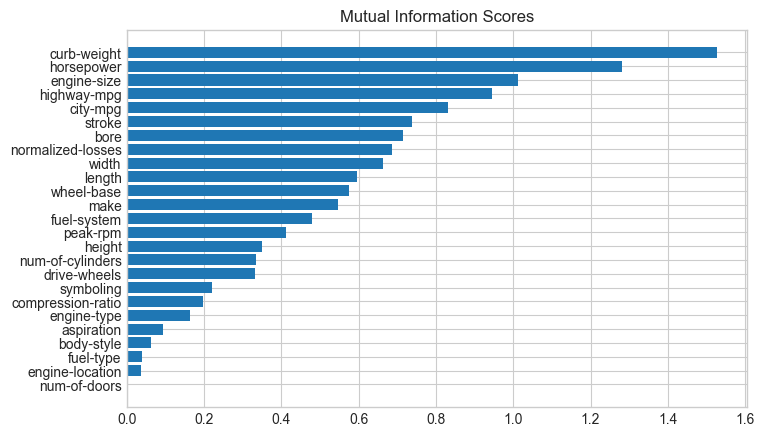

In [5]:
def plot_mi_score(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
plt.figure(dpi=100, figsize=(8,5))
plot_mi_score(mi_scores)

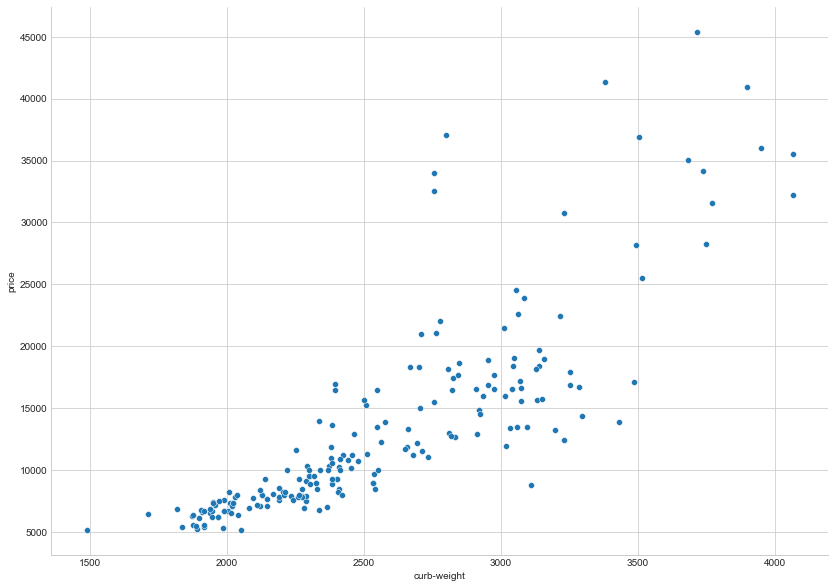

In [6]:
#plot relationship betweeen curb-weight and price
sns.relplot(x='curb-weight', y='price', data=df, height=8.27, aspect=11.7/8.27)

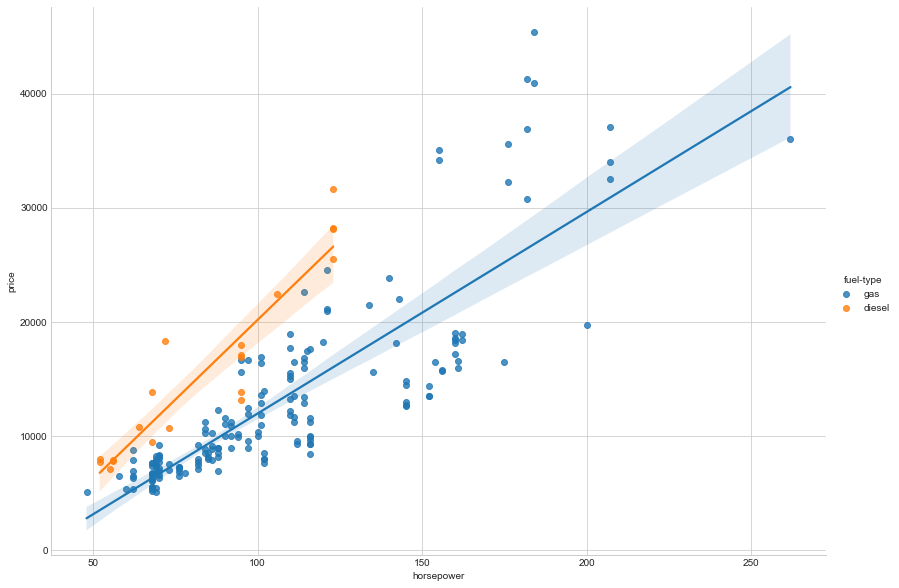

In [7]:
#compare to fuel-type
sns.lmplot(x='horsepower', y='price', hue='fuel-type', data=df, height=8.27, aspect=11.7/8.27);

horsepower and fuel-type interact with each other, these two features together might increase the predictive power to our model

### Example of house price on Ames dataset

In [8]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

#set matplot lib defaults
plt.style.use('seaborn-v0_8-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc(
    "axes",
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=14,
    titlepad=10,
)

#Load data
df = pd.read_csv("./data/house-prices-advanced-regression-techniques/train.csv")
df.drop(columns='Id', inplace=True)
df.shape

(1460, 80)

In [9]:
# see the data description
with open('./data/house-prices-advanced-regression-techniques/data_description.txt', 'r') as txt_reading:
    for line in txt_reading.readlines():
        print(line)

MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential 

In [10]:
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
#see example of nan index
df.index[df['MSZoning'].isna() == True]

Int64Index([], dtype='int64')

* nan values in those columns such as Fireplace, Fence, MiscFeautre, Pool are useful information if we consider them as 'Dont have', with label encoder will help us, so we will not drop them
* nan value in LotFrontage will be 0, using fillna
* MasvnrArea should be in int dtype data
* drop nan rows according to GarageYrBlt nan values

In [20]:
def ames_df_clearning(ames_df):
    #Lotfrontage
    ames_df['LotFrontage'] = ames_df['LotFrontage'].fillna(0)
    ames_df['MasVnrArea'] = ames_df['MasVnrArea'].fillna(0)
    
    #MasvnrArea, GarageYrBlt
    ames_df['MasVnrArea'] = ames_df['MasVnrArea'].astype(int)
    for colname in ames_df.select_dtypes(['object', 'category']):
        ames_df[colname].fillna('Not available')
    
    ames_df.drop(index=ames_df.index[df['GarageYrBlt'].isna() == True], inplace=True)
    
    return ames_df

df = ames_df_clearning(df)

In [21]:
#we want to values in every columns to determine what dtype they are?
pd.set_option('display.max_columns', None)
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
#Utility fucntions
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(['object', 'category']):
        X[colname].fillna('unavailable', inplace=True)
        X[colname], _ = X[colname].factorize()
    
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
        
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

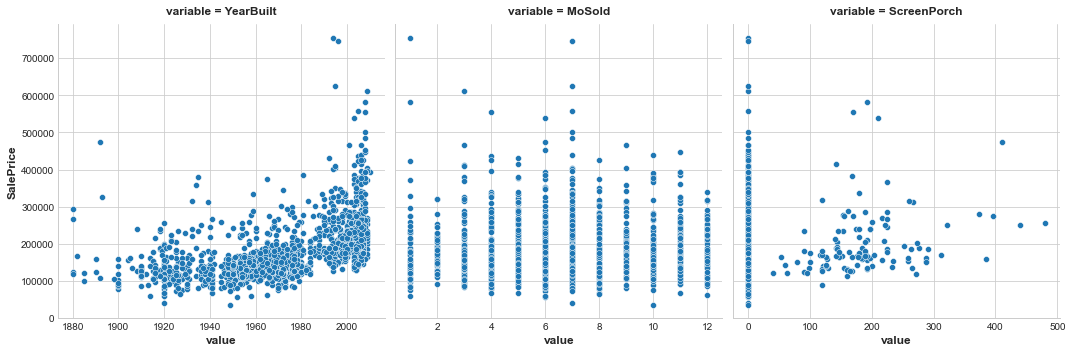

In [23]:
#samples mutual information
features = ['YearBuilt', 'MoSold', 'ScreenPorch']
sns.relplot(x='value',
           y='SalePrice',
           col='variable',
           data=df.melt(id_vars='SalePrice', value_vars=features), facet_kws=dict(sharex=False),)

In [24]:
X = df.copy()
y = X.pop('SalePrice')
#Use the make_mi_scores function to compute mutual information scores for the Ames features
mi_scores = make_mi_scores(X, y)

OverallQual     0.563523
Neighborhood    0.523986
GarageArea      0.460121
GrLivArea       0.434988
LotArea         0.404098
YearBuilt       0.395518
TotalBsmtSF     0.394998
BsmtQual        0.334673
GarageCars      0.324447
ExterQual       0.322030
KitchenQual     0.313597
1stFlrSF        0.298732
YearRemodAdd    0.281085
FullBath        0.280180
GarageYrBlt     0.263945
MSSubClass      0.242312
GarageFinish    0.218347
LotFrontage     0.211895
FireplaceQu     0.209317
OpenPorchSF     0.199542
Name: MI Scores, dtype: float64


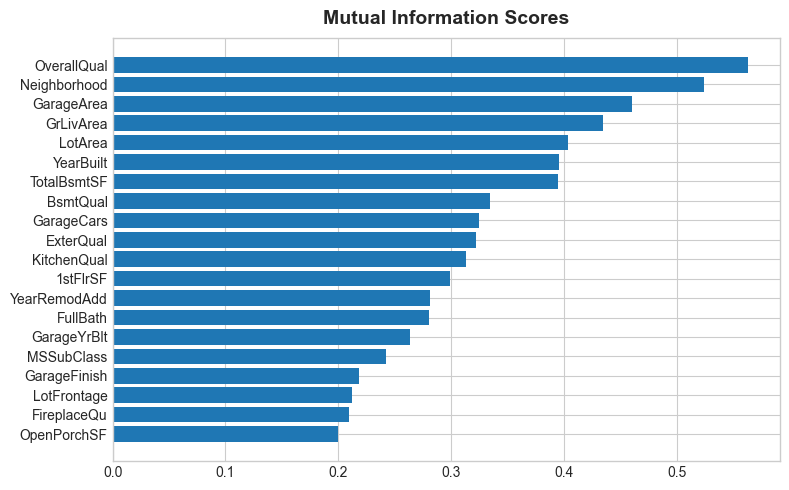

In [33]:
#top 20
print(mi_scores.head(20))

#use plot function to plot mi
plt.figure(dpi=100, figsize=(8,5))
plot_mi_scores(mi_scores.head(20))

In [32]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

BsmtHalfBath     0.015559
RoofStyle        0.015510
EnclosedPorch    0.009251
Heating          0.008620
RoofMatl         0.008048
LowQualFinSF     0.007049
Functional       0.006918
MiscFeature      0.004471
BsmtFinSF2       0.004288
ExterCond        0.003218
3SsnPorch        0.002146
LandSlope        0.001879
Condition2       0.001670
MiscVal          0.000569
Street           0.000000
PoolArea         0.000000
PoolQC           0.000000
MoSold           0.000000
YrSold           0.000000
Utilities        0.000000
Name: MI Scores, dtype: float64


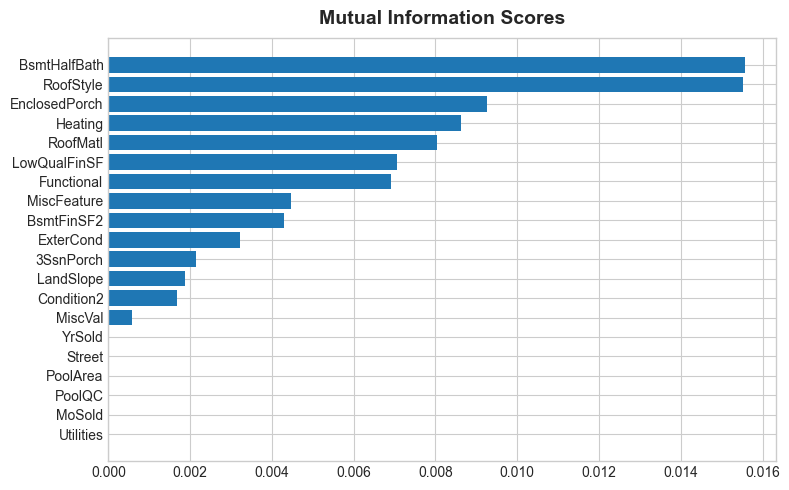

In [31]:
#bottom 20
#
print(mi_scores.tail(20))

#use plot function to plot mi
plt.figure(dpi=100, figsize=(8,5))
plot_mi_scores(mi_scores.tail(20))

#### Examine the MI scores

Some common themes among most of these features are:

* Location: Neighborhood
* Size: all of the Area and SF features, and counts like FullBath and GarageCars
* Quality: all of the Qual features
* Year: YearBuilt and YearRemodAdd
* Types: descriptions of features and styles like Foundation and GarageType

These are all the kinds of features you'll commonly see in real-estate listings (like on Zillow), It's good then that our mutual information metric scored them highly. On the other hand, the lowest ranked features seem to mostly represent things that are rare or exceptional in some way, and so wouldn't be relevant to the average home buyer.

We will go to investigate possible interaction effects for the BldgType feature.

Bldg Type (Nominal): Type of dwelling

  * 1Fam    Single-family Detached    
  * 2FmCon    Two-family Conversion; originally built as one-family dwelling
  * Duplx    Duplex
  * TwnhsE    Townhouse End Unit
  * TwnhsI    Townhouse Inside Unit


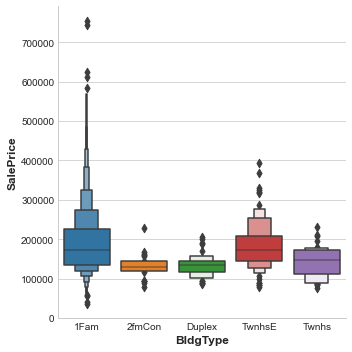

In [28]:
sns.catplot(x='BldgType', y='SalePrice', data=df, kind='boxen');

The BldgType feature does not really do a good job in term of providing any helpful infos according with SalePrice, however BldgType - Type of dwelling should provide useful information in term of predicting SalePrice, it might produce a significant interaction with other features

We will se how BldgType interact with either of GrlivArea, MoSold

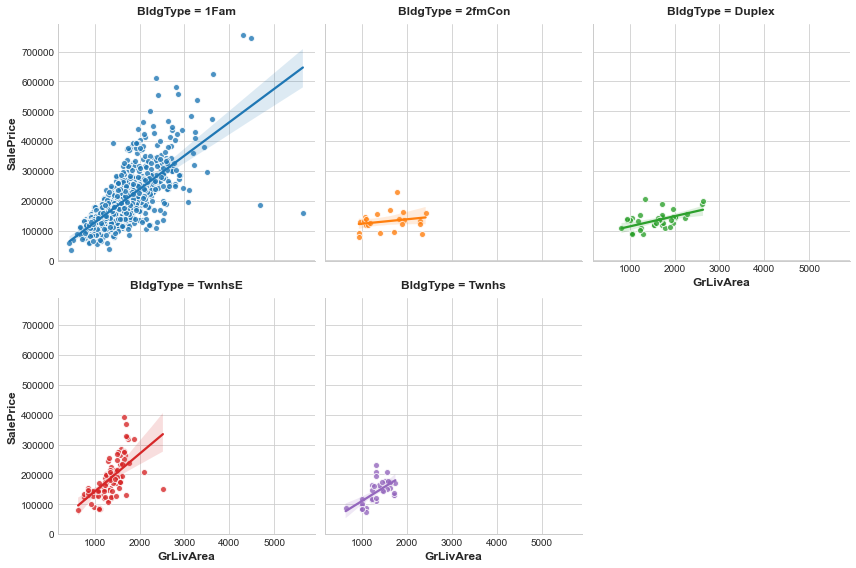

In [29]:
#'GrLivArea'
feature = 'GrLivArea'

sns.lmplot(
    x=feature, y='SalePrice', hue='BldgType', col='BldgType',
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
)

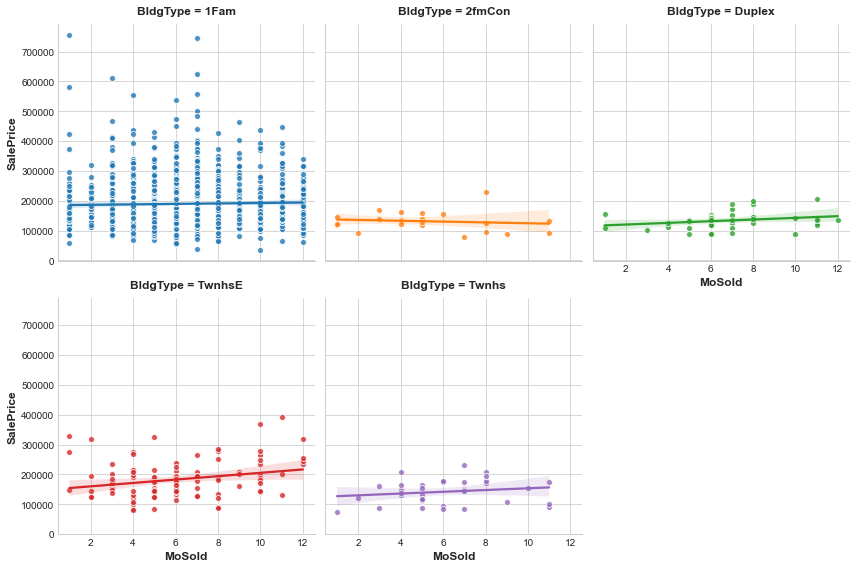

In [30]:
#'MoSold'
feature = 'MoSold'

sns.lmplot(
    x=feature, y='SalePrice', hue='BldgType', col='BldgType',
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
)

This is well finding, the trend lines in Interaction between BldgType and GrLivArea, being significantly different from one category to the next indicates an interaction effect

Knowing BldgType tells us more about how GrLivArea realtes to SalePrice, we should include BldgType in our features. Besides, the trend lines for MoSold are almost the same, there is no interaction effects, we should not include

In [34]:
mi_scores.head(10)

OverallQual     0.563523
Neighborhood    0.523986
GarageArea      0.460121
GrLivArea       0.434988
LotArea         0.404098
YearBuilt       0.395518
TotalBsmtSF     0.394998
BsmtQual        0.334673
GarageCars      0.324447
ExterQual       0.322030
Name: MI Scores, dtype: float64